In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"
df = pd.read_csv(url)


In [3]:
# Data preprocessing
df.fillna(df.mean(), inplace=True)


C:\Users\AKRAM HUSSAIN\AppData\Local\Temp\ipykernel_19332\4217842298.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [4]:
# Convert categorical variables into numerical format
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])


In [5]:
# Preprocess Dependents column
df['Dependents'].fillna('0', inplace=True)
df['Dependents'] = df['Dependents'].replace('3+', '10')
df['Dependents'] = df['Dependents'].astype(int)


In [6]:
# Split the data into features and target variable
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)


In [10]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7642276422764228


In [11]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


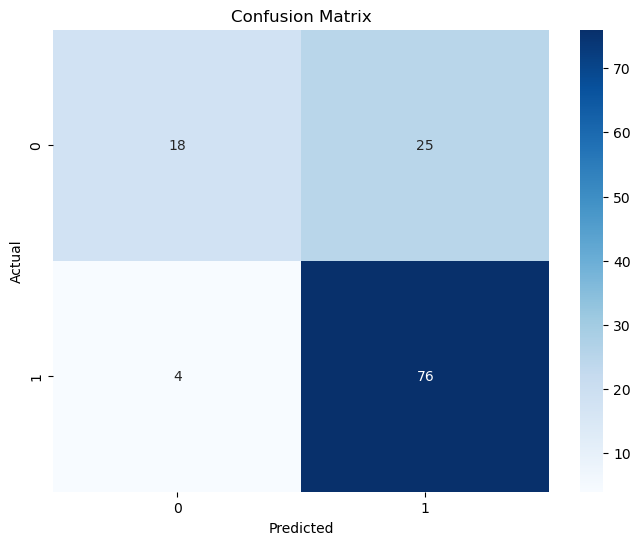

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()